In [1]:
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_csv("train.csv")

[0.21156586 0.01966109 0.16258742 0.01604118 0.1475437  0.03356576
 0.40903499]


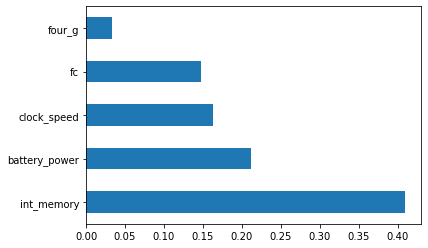

In [2]:
X = data.iloc[:, 0:20]
Y = data.iloc[:, -1]
model = ExtraTreesClassifier()
model.fit(X, Y)
print(model.feature_importances_) # use inbuilt class
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [3]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
data = pd.read_csv("train.csv")
X = data.iloc[:, 0:20]
Y = data.iloc[:, -1]
bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(X, Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
scores = pd.concat([dfcolumns, dfscores], axis=1)
scores.columns = ['specs', 'score']
print(scores.nlargest(5, 'score'))

           specs         score
6     int_memory  20539.050302
0  battery_power  11058.155685
4             fc    290.812265
1           blue     36.976457
3       dual_sim     36.485969


In [4]:
import seaborn as sns

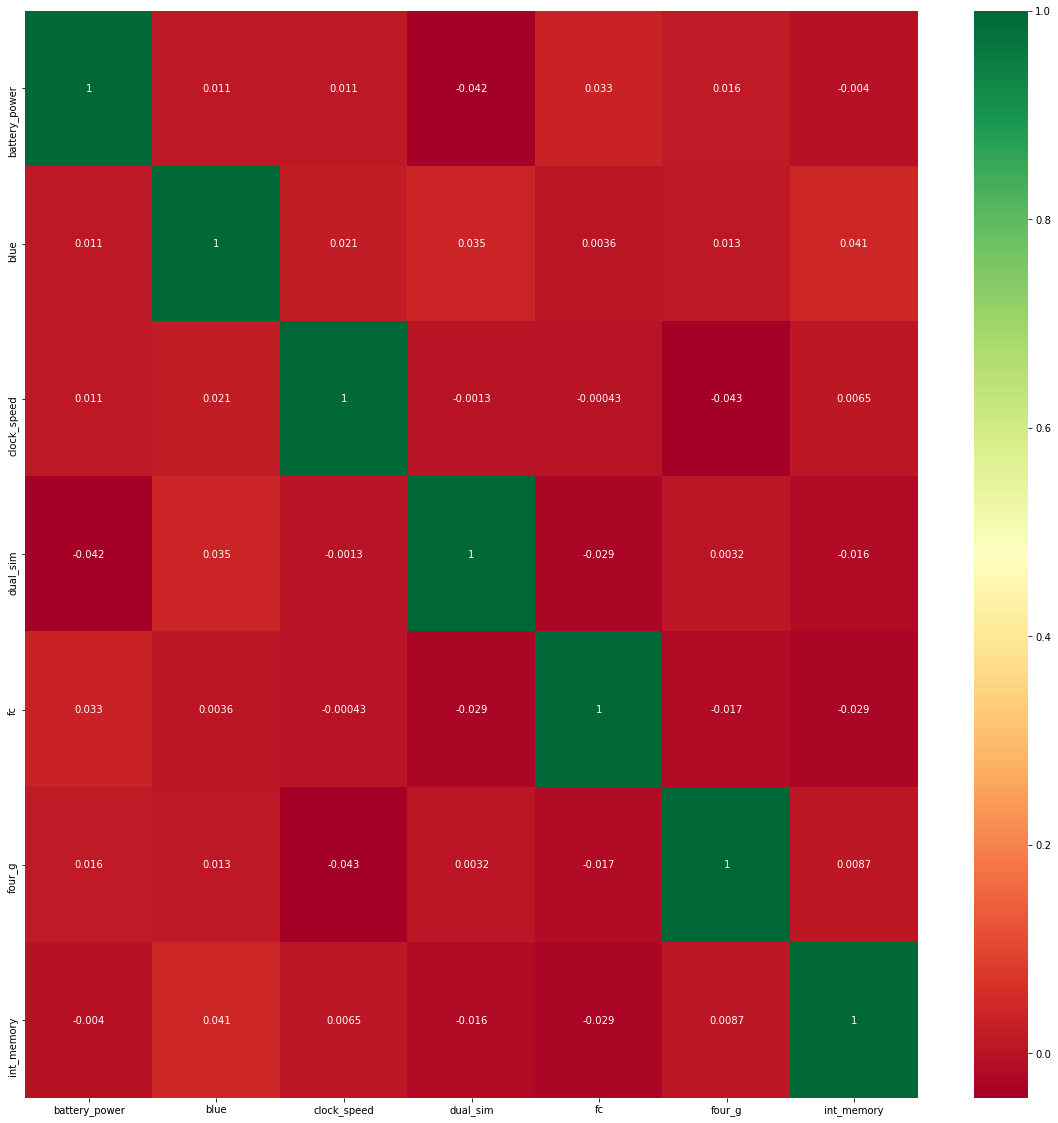

In [5]:
  
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv("train.csv")
X = data.iloc[:,0:20] #independent columns
y = data.iloc[:,-1] # pick last column for the target feature
#get the correlations of each feature in the dataset
correlation_matrix = data.corr()
top_corr_features = correlation_matrix.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [6]:
threshold = 0.6
# Drop columns with a missing value rate higher than threshold
data = data[data.columns[data.isnull().mean()<threshold]]
# Drop rows with missing value rate higher than threhold
data = data.loc[data.isnull().mean(axis=1)<threshold]
threshold = 0.6
# Drop columns with a missing value rate higher than threshold
data = data[data.columns[data.isnull().mean() < threshold]]
#Drop rows with missing value rate higher than threshold
data = data.loc[data.isnull().mean(axis=1) < threshold]
print(data)

      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory
0               842     0          2.2         0   1       0           7
1              1021     1          0.5         1   0       1          53
2               563     1          0.5         1   2       1          41
3               615     1          2.5         0   0       0          10
4              1821     1          1.2         0  13       1          44
...             ...   ...          ...       ...  ..     ...         ...
1995            794     1          0.5         1   0       1           2
1996           1965     1          2.6         1   0       0          39
1997           1911     0          0.9         1   1       1          36
1998           1512     0          0.9         0   4       1          46
1999            510     1          2.0         1   5       1          45

[2000 rows x 7 columns]


In [7]:
data = data.fillna(0)
data = data.fillna(data.median())
print(data)

      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory
0               842     0          2.2         0   1       0           7
1              1021     1          0.5         1   0       1          53
2               563     1          0.5         1   2       1          41
3               615     1          2.5         0   0       0          10
4              1821     1          1.2         0  13       1          44
...             ...   ...          ...       ...  ..     ...         ...
1995            794     1          0.5         1   0       1           2
1996           1965     1          2.6         1   0       0          39
1997           1911     0          0.9         1   1       1          36
1998           1512     0          0.9         0   4       1          46
1999            510     1          2.0         1   5       1          45

[2000 rows x 7 columns]


In [8]:
data = pd.read_csv("dataset.csv")
data['color'].fillna(data['color'].value_counts().idxmax, inplace=True)
print(data)

    index                                              color
0       0                                              green
1       1                                             yellow
2       2  <bound method Series.idxmax of red       4\nye...
3       3                                               red 
4       4                                             purple
5       5                                               red 
6       6                                               red 
7       7                                             purple
8       8  <bound method Series.idxmax of red       4\nye...
9       9                                               red 
10     10                                             yellow
11     11  <bound method Series.idxmax of red       4\nye...
12     12                                              black
13     13                                              white


In [9]:
pd.__version__

'1.0.5'

In [11]:
#Dropping the outlier rows with standard deviation
import pandas as pd
data = pd.read_csv("train.csv")
#Dropping the outlier rows with standard deviation
factor = 2
upper_lim = data['battery_power'].mean () + data['battery_power'].std() * factor
lower_lim = data['battery_power'].mean () - data['battery_power'].std() * factor
data = data[(data['battery_power'] < upper_lim) & (data['battery_power'] > lower_lim)]
print(data)

      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory
0               842     0          2.2         0   1       0           7
1              1021     1          0.5         1   0       1          53
2               563     1          0.5         1   2       1          41
3               615     1          2.5         0   0       0          10
4              1821     1          1.2         0  13       1          44
...             ...   ...          ...       ...  ..     ...         ...
1995            794     1          0.5         1   0       1           2
1996           1965     1          2.6         1   0       0          39
1997           1911     0          0.9         1   1       1          36
1998           1512     0          0.9         0   4       1          46
1999            510     1          2.0         1   5       1          45

[2000 rows x 7 columns]


In [12]:
#Dropping the outlier rows with Percentiles
upper_lim = data['battery_power'].quantile(.99)
lower_lim = data['battery_power'].quantile(.01)
data = data[(data['battery_power'] < upper_lim) & (data['battery_power'] > lower_lim)]
print(data)

      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory
0               842     0          2.2         0   1       0           7
1              1021     1          0.5         1   0       1          53
2               563     1          0.5         1   2       1          41
3               615     1          2.5         0   0       0          10
4              1821     1          1.2         0  13       1          44
...             ...   ...          ...       ...  ..     ...         ...
1994            858     0          2.2         0   1       0          50
1995            794     1          0.5         1   0       1           2
1996           1965     1          2.6         1   0       0          39
1997           1911     0          0.9         1   1       1          36
1998           1512     0          0.9         0   4       1          46

[1957 rows x 7 columns]


In [14]:
#Capping the outlier rows with percentiles
upper_lim = data['battery_power'].quantile(.99)
lower_lim = data['battery_power'].quantile(.01)
data.loc[(data['battery_power'] > upper_lim), 'battery_power'] = upper_lim
data.loc[(data['battery_power'] < lower_lim), 'battery_power'] = lower_lim
print(data)

      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory
0             842.0     0          2.2         0   1       0           7
1            1021.0     1          0.5         1   0       1          53
2             563.0     1          0.5         1   2       1          41
3             615.0     1          2.5         0   0       0          10
4            1821.0     1          1.2         0  13       1          44
...             ...   ...          ...       ...  ..     ...         ...
1994          858.0     0          2.2         0   1       0          50
1995          794.0     1          0.5         1   0       1           2
1996         1965.0     1          2.6         1   0       0          39
1997         1911.0     0          0.9         1   1       1          36
1998         1512.0     0          0.9         0   4       1          46

[1957 rows x 7 columns]
